# Ford GoBike Analysis
Problem Statement: You're a data scientist at Ford GoBike (https://www.fordgobike.com/), the company running Bay Area Bikeshare. You are trying to increase ridership, and you want to offer deals through the mobile app to do so. What deals do you offer though? Currently, your company has three options: a flat price for a single one-way trip, a day pass that allows unlimited 30-minute rides for 24 hours and an annual membership.

## Import necessary packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

%matplotlib inline

## How many trips? Who made those Trips? When were those trips made?

#### Query total number of trips by subscriber type

In [3]:

! bq query --use_legacy_sql=FALSE "\
SELECT \
    COUNT(Subscriber_trip) Subscriber_Trips, \
    COUNT(Customer_trip) Customer_Trips, \
    COUNT(*) Total_Trips\
FROM \
    (SELECT \
        CASE WHEN subscriber_type = 'Subscriber' THEN 1 END Subscriber_trip, \
        CASE WHEN subscriber_type = 'Customer' THEN 1 END Customer_trip \
    FROM \
        \`bigquery-public-data.san_francisco.bikeshare_trips\`)"

Waiting on bqjob_r1831a5ec0cea88d9_0000016b35bb0f56_1 ... (0s) Current status: DONE   
+------------------+----------------+-------------+
| Subscriber_Trips | Customer_Trips | Total_Trips |
+------------------+----------------+-------------+
|           846839 |         136809 |      983648 |
+------------------+----------------+-------------+


#### Query total number of trips by month and write the output table to a csv file

In [2]:
! bq query --use_legacy_sql=FALSE --format=csv \
"SELECT \
    FORMAT_DATE('%B', DATE(start_date)) Month,\
    COUNT(*) Total_Trips,\
    COUNT(subscriber_trip) Subscriber_Trips,\
    COUNT(customer_trip) Customer_Trips\
FROM (\
    SELECT\
        start_date,\
        CASE WHEN subscriber_type = 'Customer' THEN 1 END customer_trip,\
        CASE WHEN subscriber_type = 'Subscriber' THEN 1 END subscriber_trip\
    FROM\
        \`bigquery-public-data.san_francisco.bikeshare_trips\`)\
GROUP BY 1\
ORDER BY 2 DESC" > monthly_trips.csv

Waiting on bqjob_r5970c3449361d762_0000016b2e45897a_1 ... (0s) Current status: DONE   

#### Read monthly_trips.csv to dataframe

In [33]:
monthly_trips = pd.read_csv('monthly_trips.csv', index_col='Month')
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']
monthly_trips.index = pd.Categorical(monthly_trips.index, categories=months, ordered=True)
monthly_trips.sort_index(inplace=True)
monthly_trips

,Total_Trips,Subscriber_Trips,Customer_Trips
January,71788,64075,7713
February,69985,62123,7862
March,81777,71619,10158
April,84196,74218,9978
May,86364,73623,12741
June,91672,79525,12147
July,89539,76387,13152
August,95576,80033,15543
September,87321,70011,17310
October,94378,80340,14038


#### Plot number of trips by month by subscriber type

Text(-0.3, 71000, 'Average Trips by Subscriber')

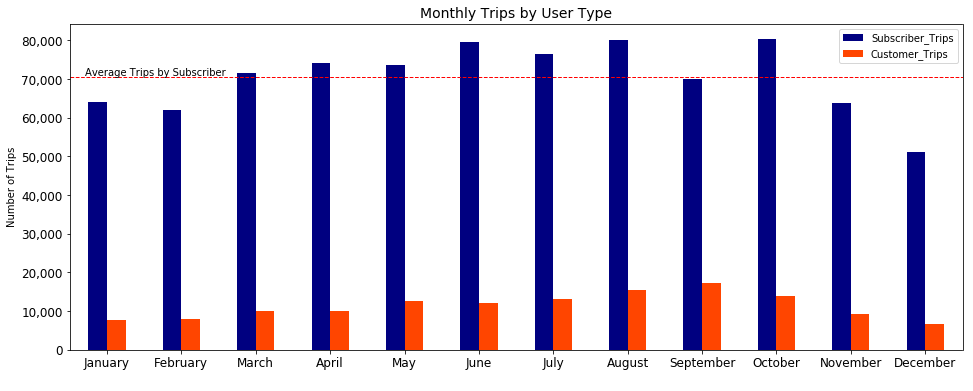

In [43]:
ax = monthly_trips[['Subscriber_Trips', 'Customer_Trips']].plot(kind='bar', 
                                                                rot=0, 
                                                                figsize=(16,6), 
                                                                color=['navy', 'orangered']) 
ax.set_title('Monthly Trips by User Type', fontsize=14)
ax.set_ylabel('Number of Trips')
ax.set_xlabel(' ')

fmt = '{x:,.0f}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

ax.axhline(monthly_trips['Subscriber_Trips'].mean(), color='red', linestyle='dashed',linewidth=1)
ax.text(-0.3, 71000,'Average Trips by Subscriber', fontsize=10)

#### Query total number of trips by hour of day and write the output table to a csv file

In [28]:
! bq query --use_legacy_sql=FALSE --format=csv \
"SELECT \
    EXTRACT(HOUR FROM start_date) Hour,\
    COUNT(*) Total_Trips,\
    COUNT(subscriber_trip) Subscriber_Trips,\
    COUNT(customer_trip) Customer_Trips\
FROM (\
    SELECT\
        start_date,\
        CASE WHEN subscriber_type = 'Customer' THEN 1 END customer_trip,\
        CASE WHEN subscriber_type = 'Subscriber' THEN 1 END subscriber_trip\
    FROM\
        \`bigquery-public-data.san_francisco.bikeshare_trips\`)\
GROUP BY 1\
ORDER BY 1" > hourly_trips.csv

Waiting on bqjob_r3655373e81c15663_0000016b35cda3ce_1 ... (1s) Current status: DONE   

#### Read the hourly_trips.csv file to dataframe

In [30]:
hourly_trips = pd.read_csv('hourly_trips.csv')
hourly_trips

,Hour,Total_Trips,Subscriber_Trips,Customer_Trips
0,0,2929,2081,848
1,1,1611,972,639
2,2,877,464,413
3,3,605,397,208
4,4,1398,1238,160
5,5,5098,4795,303
6,6,20519,19574,945
7,7,67531,64946,2585
8,8,132464,127171,5293
9,9,96118,89546,6572


#### Plot number of trips by hour

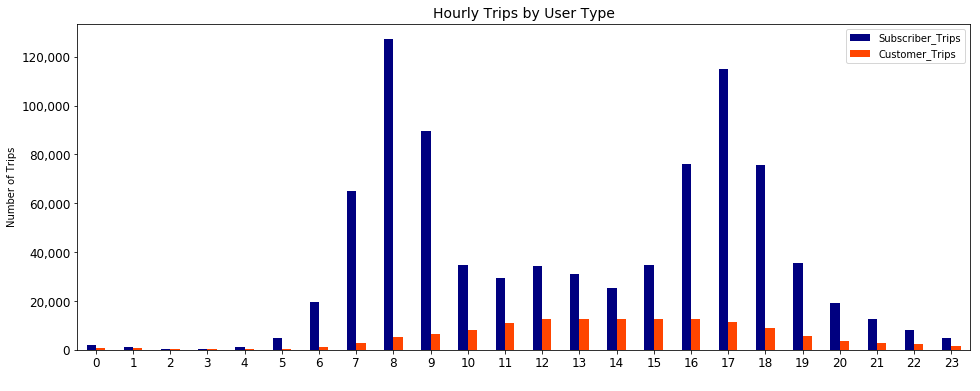

In [33]:
ax = hourly_trips[['Subscriber_Trips', 'Customer_Trips']].plot(kind='bar', 
                                                                rot=0, 
                                                                figsize=(16,6), 
                                                                color=['navy', 'orangered']) 
ax.set_title('Hourly Trips by User Type', fontsize=14)
ax.set_ylabel('Number of Trips')
ax.set_xlabel(' ')

fmt = '{x:,.0f}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

<font color=red>I was planning on doing a heatmap for number of trips by day of week and time of day, but big query only returns 100 rows in jupyter notebook, so wasn't able to do that. When I used the same query in big query, it returns the correct number of results. Does jupyter notebook have a limit of rows to return from google big query? </font>

#### Therefore,
- Most trips are taken by **subscribers**
- Number of subscriber trips stayed relatively stable from month to month; number of customer trips peaked in **September**
- The trips by hour plot shows the typical AM and PM **commuting peaks** for subscribers and the smooth trip curve for customers.



## Trip Duration

#### Less than 30 mins

In [69]:
# Query number and percentage of trips that are less than 30 mins

! bq query --use_legacy_sql=FALSE --format=csv \
"SELECT \
    subscriber_type User_Type, \
    COUNT(*) Number_of_Trips, \
    COUNT(*)/(SELECT \
                  COUNT(*) \
              FROM \
                  \`bigquery-public-data.san_francisco.bikeshare_trips\` \
              WHERE \
                  subscriber_type = CASE WHEN t.subscriber_type='Customer' \
                                    THEN 'Customer' \
                                    ELSE 'Subscriber' \
                                    END) Percentage_Share\
FROM \
    \`bigquery-public-data.san_francisco.bikeshare_trips\` t \
WHERE \
    (duration_sec)/60 < 30 \
GROUP BY 1" > Less_than_30_Trips.csv

Waiting on bqjob_re8badf176533a18_0000016b2f783fd0_1 ... (0s) Current status: DONE   

In [3]:
# Read csv into dataframe

less_than_30 = pd.read_csv('Less_than_30_Trips.csv')
less_than_30

,User_Type,Number_of_Trips,Percentage_Share
0,Customer,94777,0.692769
1,Subscriber,841503,0.993699


#### Less than 15 mins

In [79]:
# Query number and percentage of trips that are less than 15 mins

! bq query --use_legacy_sql=FALSE --format=csv \
"SELECT \
    subscriber_type User_Type, \
    COUNT(*) Number_of_Trips, \
    COUNT(*)/(SELECT \
                  COUNT(*) \
              FROM \
                  \`bigquery-public-data.san_francisco.bikeshare_trips\` \
              WHERE \
                  subscriber_type = CASE WHEN t.subscriber_type='Customer' \
                                    THEN 'Customer' \
                                    ELSE 'Subscriber' \
                                    END) Percentage_Share\
FROM \
    \`bigquery-public-data.san_francisco.bikeshare_trips\` t \
WHERE \
    (duration_sec)/60 < 15 \
GROUP BY 1" > Less_than_15_Trips.csv

Waiting on bqjob_r16a1f55bd1c48995_0000016b2f7fb2b0_1 ... (0s) Current status: DONE   

In [81]:
less_than_15 = pd.read_csv('Less_than_15_Trips.csv')
less_than_15

,User_Type,Number_of_Trips,Percentage_Share
0,Customer,53464,0.390793
1,Subscriber,772263,0.911936


#### From this, 
- we can see that most of the subscriber trips are **less than 15 mins** long, and yet they are paying for **30-min trip** windows

## Most popular commuter trips

In [13]:
# Query the most popular commute trip routes and their origin/destination coordinates

! bq query --use_legacy_sql=FALSE --format=csv \
"SELECT \
    t.start_station_name Origin, \
    t.end_station_name Destination, \
    s.latitude start_lat, \
    s.longitude start_lon, \
    e.latitude end_lat, \
    e.longitude end_lon, \
    count(*) AS NumTrips \
FROM \
    \`bigquery-public-data.san_francisco.bikeshare_trips\` t \
JOIN \
    \`bigquery-public-data.san_francisco.bikeshare_stations\` s \
ON \
    t.start_station_id = s.station_id \
JOIN \
    \`bigquery-public-data.san_francisco.bikeshare_stations\` e \
ON \
    t.end_station_id = e.station_id \
WHERE duration_sec/60 < 30 \
GROUP BY \
    1, 2, 3, 4, 5, 6 \
ORDER BY \
    NumTrips DESC" > top5_commuter_route.csv

Waiting on bqjob_r356d452a2c9d6539_0000016b35beeed8_1 ... (1s) Current status: DONE   

In [14]:
top5_commuter_route = pd.read_csv('top5_commuter_route.csv')[:5]
top5_commuter_route

,Origin,Destination,start_lat,start_lon,end_lat,end_lon,NumTrips
0,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,37.776600,-122.395470,37.771058,-122.402717,8474
1,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,37.795392,-122.394203,37.804770,-122.403234,7841
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),37.780526,-122.390288,37.795392,-122.394203,7550
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,37.795392,-122.394203,37.780526,-122.390288,6814
4,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),37.771058,-122.402717,37.776600,-122.395470,6812


# Conclusions & Recommendations:
- 69% of the customer's trips are less than 30 mins, and 99% of the subscriber's trips are less than 30 mins.
- 39% of the customer's trips are less than 15 mins, and 91% of the subscriber's trips are less than 30 mins.
- 45-min and 30-min package for subscribers are way too much.
- **Propose cheaper day and annual pass options with unlimited 15-min rides to incentive more commuters to sign up.**